##### 小畫家 ( 可調整畫筆顏色、粗細和存檔 )
這篇教學會將 PyQt5 結合 QPixmap、QLabel 和 QPushbutton 等功能元件，實作一個簡單的小畫家功能 ( 調整畫筆粗細、顏色 )，\
讓使用者可以使用滑鼠進行繪圖，並且將繪製的圖片存檔成為 PNG。

##### 預計畫面功能與效果 
要實作一個簡單的小畫家，大概需要有下列幾種要素：
* 開新檔案、另存檔案和關閉的視窗選單。
* 使用滑鼠繪圖的空白畫布。
* 顏色選擇按鈕以及畫筆粗細選擇按鈕。

透過這幾種要素的組合，預期可以得到下圖一樣的效果，接下來就準備按照下圖進行實作：

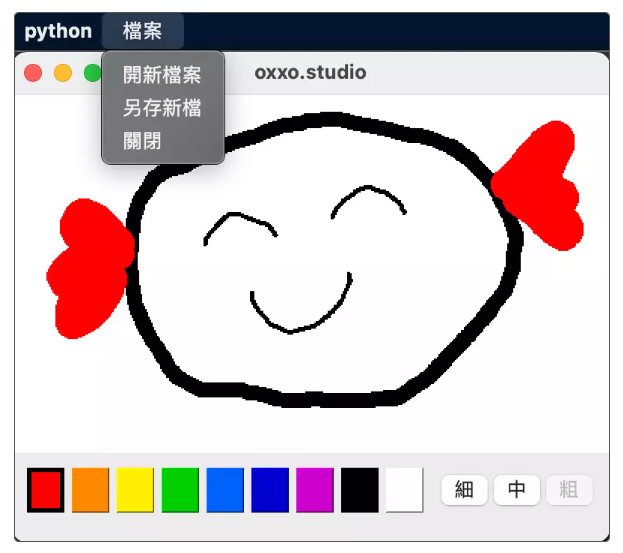

##### 使用滑鼠繪圖 
參考「QPainter 繪圖」和「偵測滑鼠事件」的教學範例，可以透過編輯 mousePressEvent、mouseMoveEvent 和 mouseReleaseEvent 屬性，\
實作出在 QPixmap 元件中繪圖的功能，詳細說明寫在下方程式碼中：

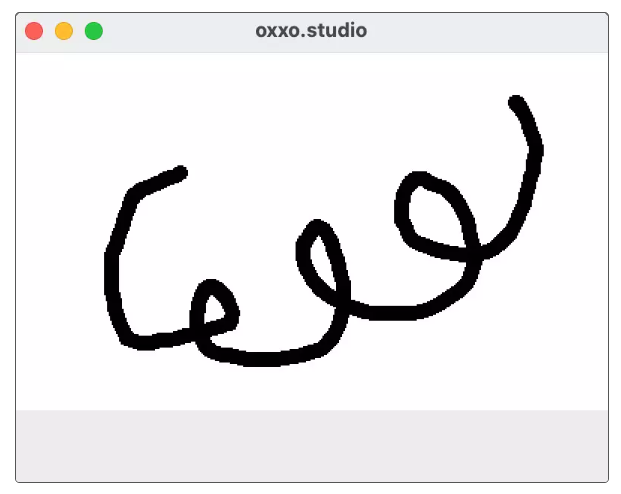

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(400, 300)                # 主視窗大小

canvas = QPixmap(400,240)                  # 建立 QPixmap 元件作為畫布，並設定畫布大小
canvas.fill(QColor('#ffffff'))             # 畫布填滿白色

label = QtWidgets.QLabel(MainWindow)       # 建立 QLabel
label.setGeometry(0, 0, 400, 240)          # 設定大小位置，下方留下一些空白
label.setPixmap(canvas)                    # 放入畫布

last_x, last_y = None, None                # 設定兩個變數紀錄滑鼠座標
penSize = 10                               # 畫筆預設粗細
penColor = QColor('#000000')               # 畫筆預設顏色

# 放開滑鼠的函式
def release(self):
    global last_x, last_y
    last_x, last_y = None, None            # 清空座標內容

# 按下滑鼠的函式
def mousePress(self):
    global penColor, penSize
    qpainter = QPainter()                  # 建立 QPainter 元件
    qpainter.begin(label.pixmap())         # 在畫布中開始繪圖
    qpainter.setPen(QPen(QColor(penColor), penSize, Qt.SolidLine, Qt.RoundCap)) # 設定畫筆樣式
    qpainter.drawPoint(self.x(), self.y()) # 下筆畫出一個點
    qpainter.end()                         # 結束繪圖
    MainWindow.update()                    # 更新主視窗內容

# 按下滑鼠並移動滑鼠的函式
def draw(self):
    global last_x, last_y, penColor, penSize
    if last_x is None:
        last_x = self.x()                  # 紀錄滑鼠當下的座標
        last_y = self.y()
        return
    qpainter = QPainter()                  # 建立 QPainter 元件
    qpainter.begin(label.pixmap())         # 在畫布中開始繪圖
    qpainter.setPen(QPen(penColor, penSize, Qt.SolidLine, Qt.RoundCap)) # 設定畫筆樣式
    qpainter.drawLine(last_x, last_y, self.x(), self.y()) # 下筆畫出一條線
    qpainter.end()                         # 結束繪圖
    MainWindow.update()                    # 更新主視窗內容
    last_x = self.x()                      # 紀錄結束座標
    last_y = self.y()

label.mousePressEvent  = mousePress        # 設定按下滑鼠並移動的事件
label.mouseMoveEvent = draw                # 設定按下滑鼠的事件
label.mouseReleaseEvent = release          # 設定放開滑鼠的事件

MainWindow.show()
sys.exit(app.exec_())

##### 加入顏色選擇按鈕 
延續上述的程式，在主程式裡加入下面的程式碼，執行後就會出現可以選擇並切換顏色的按鈕 ( 注意 lambda 要額外加入一個 checked 參數 )。

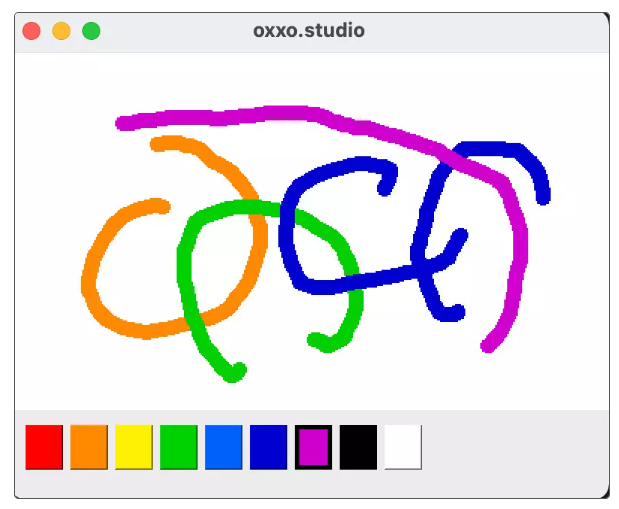

In [ ]:
# 點擊按鈕更換顏色函式
def changeColor(self, color):
    global penColor, btn
    penColor = QColor(color)      # 設定畫筆顏色
    for i in btn:
        btn[i].setDisabled(False) # 啟用所有按鈕
    self.setDisabled(True)        # 停用所點擊的按鈕

# 設定顏色清單
colors = ['#ff0000','#ff8800','#ffee00','#00cc00','#0066ff','#0000cc','#cc00cc','#000000','#ffffff']
btn = {}   # 因為有很多按鈕，所以使用字典方式紀錄元件
# 依序讀取顏色清單中的顏色
for i in colors:
    index = colors.index(i)   # 取得該顏色的位置 ( 按鈕定位使用 )
    btn[i] = QtWidgets.QPushButton(MainWindow) # 建立按鈕元件
    # 設定樣式，當中額外設定禁用時的樣式
    btn[i].setStyleSheet('''
        QPushButton{
            background:'''+i+''';
            margin-right:5px;
        }
        QPushButton:disabled{
            border:3px solid #000;
        }
    ''')
    btn[i].setGeometry(index*30+10,250,30,30)   # 設定每個按鈕的位置
    btn[i].clicked.connect(lambda checked, b=btn[i], c=i:  changeColor(b, c)) # 設定點擊事件

##### 加入畫筆粗細選擇按鈕 
延續上述的程式，在主程式裡加入下面的程式碼，執行後就會出現可以選擇並切換畫筆粗細的按鈕。

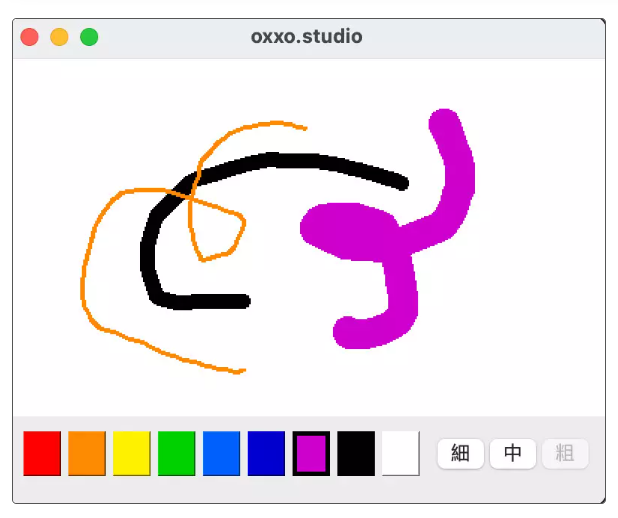

In [ ]:
# 切換畫筆粗細函式
def changeSize(self, size):
    global penSize
    btn_s.setDisabled(False)  # 啟用「細」的按鈕
    btn_m.setDisabled(False)  # 啟用「中」的按鈕
    btn_l.setDisabled(False)  # 啟用「粗」的按鈕
    penSize = size            # 設定畫筆粗細
    self.setDisabled(True)    # 停用所點選的按鈕

btn_s = QtWidgets.QPushButton(MainWindow)             # 建立「細」的按鈕
btn_s.setText('細')
btn_s.setGeometry(280, 250, 45, 30)                   # 設定位置
btn_s.clicked.connect(lambda: changeSize(btn_s, 3))   # 設定點擊事件
btn_m = QtWidgets.QPushButton(MainWindow)             # 建立「中」的按鈕
btn_m.setText('中')
btn_m.setGeometry(315, 250, 45, 30)                   # 設定位置
btn_m.setDisabled(True)                               # 因為預設中，所以先停用中的按鈕
btn_m.clicked.connect(lambda: changeSize(btn_m, 10))  # 設定點擊事件
btn_l = QtWidgets.QPushButton(MainWindow)             # 建立「粗」的按鈕
btn_l.setText('粗')
btn_l.setGeometry(350, 250, 45, 30)                   # 設定位置
btn_l.clicked.connect(lambda: changeSize(btn_l, 20))  # 設定點擊事件

##### 加入視窗選單功能 ( 開新檔案、另存新檔 ) 
延續上述的程式，在主程式裡加入下面的程式碼，執行後在視窗的最上方，就會出現視窗選單 ( 參考「QMenuBar、QMenu、QAction 視窗選單」 )。

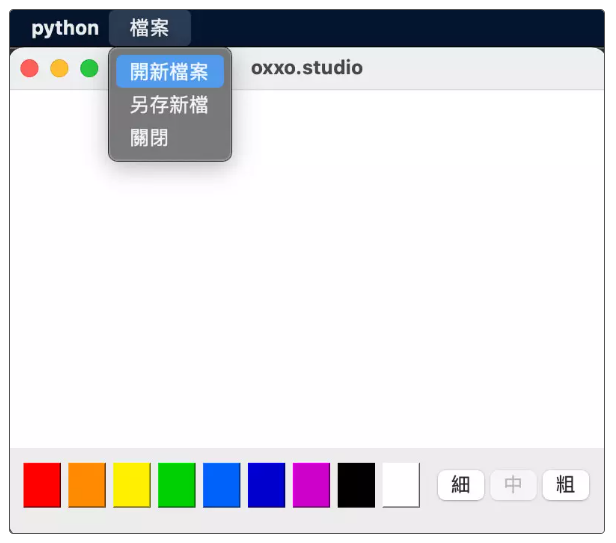

In [ ]:
# 開新檔案的函式
def newFile():
    ret = mbox.question(MainWindow, 'question', '確定開新檔案？')  # 出現對話視窗確認
    if ret == mbox.Yes:
        canvas.fill(QColor('#ffffff'))   # 如果按下 yes，用白色填滿畫布
        label.setPixmap(canvas)          # 重新設定畫布
    else:
        return                           # 否則就不做動作，跳出函式

# 儲存檔案的函式
def saveFile():
    filePath, filterType = QtWidgets.QFileDialog.getSaveFileName(MainWindow, '另存新檔', '', 'JPG(*.jpg)')  # 建立開啟檔案對話視窗，設定成存檔方式
    label.pixmap().save(filePath,'JPG',90)   # 儲存為 jpg，品質 90

# 關閉的函式
def closeFile():
    app.quit()   # 結束視窗

mbox = QtWidgets.QMessageBox(MainWindow)  # 建立對話視窗
menubar = QtWidgets.QMenuBar(MainWindow)  # 建立 menubar
menu_file = QtWidgets.QMenu('檔案')        # 建立一個 File 選項 ( QMenu )
action_new = QtWidgets.QAction('開新檔案')  # 建立一個 new 選項 ( QAction )
action_new.triggered.connect(newFile)
menu_file.addAction(action_new)            # 將 new 選項放入 File 選項裡
action_save = QtWidgets.QAction('另存新檔') # 建立一個 save 選項 ( QAction )
menu_file.addAction(action_save)           # 將 save 選項放入 File 選項裡
action_save.triggered.connect(saveFile)
action_close = QtWidgets.QAction('關閉')    # 建立一個 close 選項 ( QAction )
menu_file.addAction(action_close)          # 將 close 選項放入 File 選項裡
action_close.triggered.connect(closeFile)
menubar.addMenu(menu_file)                 # 將 File 選項放入 menubar 裡

##### 完整程式碼
一般寫法：

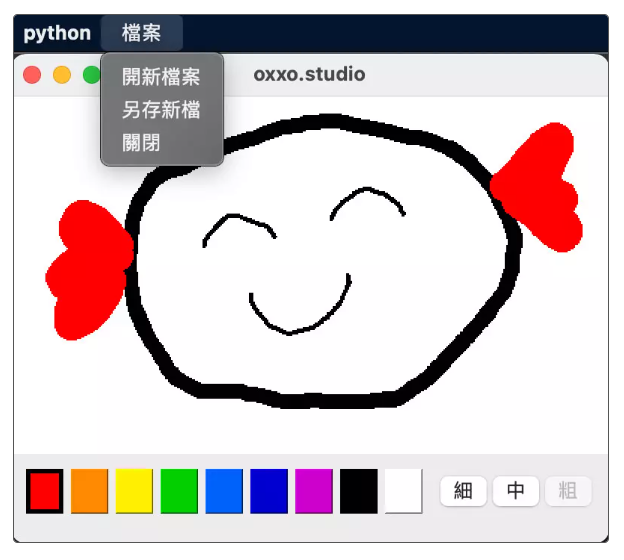

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(400, 300)

canvas = QPixmap(400,240)
canvas.fill(QColor('#ffffff'))

label = QtWidgets.QLabel(MainWindow)
label.setGeometry(0, 0, 400, 240)
label.setPixmap(canvas)

last_x, last_y = None, None
penSize = 10
penColor = QColor('#000000')

def release(self):
    global last_x, last_y
    last_x, last_y = None, None

def mousePress(self):
    global penColor, penSize
    qpainter = QPainter()
    qpainter.begin(label.pixmap())
    qpainter.setPen(QPen(QColor(penColor), penSize, Qt.SolidLine, Qt.RoundCap))
    qpainter.drawPoint(self.x(), self.y())
    qpainter.end()
    MainWindow.update()

def draw(self):
    global last_x, last_y, penColor, penSize
    if last_x is None:
        last_x = self.x()
        last_y = self.y()
        return
    qpainter = QPainter()
    qpainter.begin(label.pixmap())
    qpainter.setPen(QPen(penColor, penSize, Qt.SolidLine, Qt.RoundCap))
    qpainter.drawLine(last_x, last_y, self.x(), self.y())
    qpainter.end()
    MainWindow.update()
    last_x = self.x()
    last_y = self.y()

label.mousePressEvent  = mousePress
label.mouseMoveEvent = draw
label.mouseReleaseEvent = release

def changeColor(self, color):
    global penColor, btn
    penColor = QColor(color)
    for i in btn:
        btn[i].setDisabled(False)
    self.setDisabled(True)

colors = ['#ff0000','#ff8800','#ffee00','#00cc00','#0066ff','#0000cc','#cc00cc','#000000','#ffffff']
btn = {}
for i in colors:
    index = colors.index(i)
    btn[i] = QtWidgets.QPushButton(MainWindow)
    btn[i].setStyleSheet('''
        QPushButton{
            background:'''+i+''';
            margin-right:5px;
        }
        QPushButton:disabled{
            border:3px solid #000;
        }
    ''')
    btn[i].setGeometry(index*30+10,250,30,30)
    btn[i].clicked.connect(lambda checked, b=btn[i], c=i:  changeColor(b, c))

def changeSize(self, size):
    global penSize
    btn_s.setDisabled(False)
    btn_m.setDisabled(False)
    btn_l.setDisabled(False)
    penSize = size
    self.setDisabled(True)

btn_s = QtWidgets.QPushButton(MainWindow)
btn_s.setText('細')
btn_s.setGeometry(280, 250, 45, 30)
btn_s.clicked.connect(lambda: changeSize(btn_s, 3))
btn_m = QtWidgets.QPushButton(MainWindow)
btn_m.setText('中')
btn_m.setGeometry(315, 250, 45, 30)
btn_m.setDisabled(True)
btn_m.clicked.connect(lambda: changeSize(btn_m, 10))
btn_l = QtWidgets.QPushButton(MainWindow)
btn_l.setText('粗')
btn_l.setGeometry(350, 250, 45, 30)
btn_l.clicked.connect(lambda: changeSize(btn_l, 20))

def newFile():
    ret = mbox.question(MainWindow, 'question', '確定開新檔案？')
    if ret == mbox.Yes:
        canvas.fill(QColor('#ffffff'))
        label.setPixmap(canvas)
    else:
        return

def saveFile():
    filePath, filterType = QtWidgets.QFileDialog.getSaveFileName(MainWindow, '另存新檔', '', 'JPG(*.jpg)')
    label.pixmap().save(filePath,'JPG',90)

def closeFile():
    app.quit()

mbox = QtWidgets.QMessageBox(MainWindow)

menubar = QtWidgets.QMenuBar(MainWindow)
menu_file = QtWidgets.QMenu('檔案')
action_new = QtWidgets.QAction('開新檔案')
action_new.triggered.connect(newFile)
menu_file.addAction(action_new)
action_save = QtWidgets.QAction('另存新檔')
menu_file.addAction(action_save)
action_save.triggered.connect(saveFile)
action_close = QtWidgets.QAction('關閉')
menu_file.addAction(action_close)
action_close.triggered.connect(closeFile)
menubar.addMenu(menu_file)

MainWindow.show()
sys.exit(app.exec_())

使用 class 的寫法：

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys

# 定义一个继承自 QWidget 的类 MyWidget，用于创建主窗口。
class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')  # 设置窗口标题
        self.resize(400, 300)  # 设置窗口大小
        # 初始化界面组件
        self.ui()
        self.colorBtn()
        self.sizeBtn()
        self.menubar()

    # 初始化画布和标签
    def ui(self):
        self.last_x, self.last_y = None, None  # 初始化鼠标最后位置
        self.penSize = 10  # 初始画笔大小
        self.penColor = QColor('#000000')  # 初始画笔颜色
        self.canvas = QPixmap(400, 240)  # 创建一个画布
        self.canvas.fill(QColor('#ffffff'))  # 用白色填充画布
        self.label = QtWidgets.QLabel(self)  # 在窗口中创建一个标签
        self.label.setGeometry(0, 0, 400, 240)  # 设置标签大小和位置
        self.label.setPixmap(self.canvas)  # 将画布设置为标签的显示内容

    # 处理鼠标按下事件
    def mousePressEvent(self, event):
        qpainter = QPainter()
        qpainter.begin(self.label.pixmap())  # 开始在标签的画布上绘制
        qpainter.setPen(QPen(QColor(self.penColor), self.penSize, Qt.SolidLine, Qt.RoundCap))
        qpainter.drawPoint(event.x(), event.y())  # 在点击的位置绘制点
        qpainter.end()
        self.update()  # 更新显示

    # 处理鼠标移动事件
    def mouseMoveEvent(self, event):
        if self.last_x is None:  # 如果没有上一个点则设置当前点为起始点
            self.last_x = event.x()
            self.last_y = event.y()
            return
        qpainter = QPainter()
        qpainter.begin(self.label.pixmap())
        qpainter.setPen(QPen(self.penColor, self.penSize, Qt.SolidLine, Qt.RoundCap))
        qpainter.drawLine(self.last_x, self.last_y, event.x(), event.y())  # 绘制线段
        qpainter.end()
        self.update()
        self.last_x = event.x()
        self.last_y = event.y()

    # 处理鼠标释放事件
    def mouseReleaseEvent(self, event):
        self.last_x, self.last_y = None, None  # 重置最后位置

    # 创建颜色选择按钮
    def colorBtn(self):
        colors = ['#ff0000', '#ff8800', '#ffee00', '#00cc00', '#0066ff', '#0000cc', '#cc00cc', '#000000', '#ffffff']
        self.btn = {}
        for i in colors:
            index = colors.index(i)
            self.btn[i] = QtWidgets.QPushButton(self)
            self.btn[i].setStyleSheet('''
                QPushButton{
                    background:'''+i+''';
                    margin-right:5px;
                }
                QPushButton:disabled{
                    border:3px solid #000;
                }
            ''')
            self.btn[i].colorIndex = index
            self.btn[i].setGeometry(index*30+10, 250, 30, 30)
            self.btn[i].clicked.connect(lambda checked, b=self.btn[i], c=i: self.changeColor(b, c))

    # 改变画笔颜色
    def changeColor(self, thisBtn, color):
        self.penColor = QColor(color)
        for i in self.btn:
            self.btn[i].setDisabled(False)
        thisBtn.setDisabled(True)

    # 创建画笔大小按钮
    def sizeBtn(self):
        self.btn_s = QtWidgets.QPushButton(self)
        self.btn_s.setText('細')
        self.btn_s.setGeometry(280, 250, 45, 30)
        self.btn_s.clicked.connect(lambda: self.changeSize(self.btn_s, 3))
        self.btn_m = QtWidgets.QPushButton(self)
        self.btn_m.setText('中')
        self.btn_m.setGeometry(315, 250, 45, 30)
        self.btn_m.setDisabled(True)
        self.btn_m.clicked.connect(lambda: self.changeSize(self.btn_m, 10))
        self.btn_l = QtWidgets.QPushButton(self)
        self.btn_l.setText('粗')
        self.btn_l.setGeometry(350, 250, 45, 30)
        self.btn_l.clicked.connect(lambda: self.changeSize(self.btn_l, 20))

    # 改变画笔大小
    def changeSize(self, thisBtn, size):
        self.btn_s.setDisabled(False)
        self.btn_m.setDisabled(False)
        self.btn_l.setDisabled(False)
        self.penSize = size
        thisBtn.setDisabled(True)

    # 创建菜单栏
    def menubar(self):
        self.mbox = QtWidgets.QMessageBox(self)
        self.menubar = QtWidgets.QMenuBar(self)
        self.menu_file = QtWidgets.QMenu('檔案')
        self.action_new = QtWidgets.QAction('開新檔案')
        self.action_new.triggered.connect(self.newFile)
        self.menu_file.addAction(self.action_new)
        self.action_save = QtWidgets.QAction('另存新檔')
        self.menu_file.addAction(self.action_save)
        self.action_save.triggered.connect(self.saveFile)
        self.action_close = QtWidgets.QAction('關閉')
        self.menu_file.addAction(self.action_close)
        self.action_close.triggered.connect(self.closeFile)
        self.menubar.addMenu(self.menu_file)

    # 新建文件
    def newFile(self):
        ret = self.mbox.question(self, 'question', '確定開新檔案？')
        if ret == self.mbox.Yes:
            self.canvas.fill(QColor('#ffffff'))
            self.label.setPixmap(self.canvas)
        else:
            return

    # 保存文件
    def saveFile(self):
        filePath, filterType = QtWidgets.QFileDialog.getSaveFileName(self, '另存新檔', '', 'JPG(*.jpg)')  # 弹出保存对话框
        if filePath:  # 如果有指定路径，则保存文件
            self.label.pixmap().save(filePath, 'JPG', 90)  # 保存为 JPG 格式

    # 关闭应用
    def closeFile(self):
        app.quit()  # 退出程序

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    sys.exit(app.exec_())